# Estimation and Confidence Intervals

1.Background & Scenario
In the modern electronics manufacturing industry, ensuring product quality is a critical part of business success. For high-value components such as print-heads used in personal computers, durability testing is an important quality control step.
However, such tests are destructive in nature — meaning, once tested, the component is damaged and cannot be sold. This makes large-scale testing costly and impractical.
In this study, a manufacturer wishes to estimate the mean durability of print-heads, measured as the number of millions of characters printed before failure. Due to the cost of testing, only 15 units were selected for durability testing.
The durability values (in millions of characters) were:

1.13, 1.55, 1.43, 0.92, 1.25, 1.36, 1.32, 0.85, 1.07, 1.48, 1.20, 1.33, 1.18, 1.22, 1.29
The manufacturer’s aim is to construct 99% confidence intervals using:
a) Sample Standard Deviation (t-distribution)
b) Known Population Standard Deviation (z-distribution)


# 2. Objective
The objective is to estimate the true mean durability of print-heads with 99% confidence using two approaches:

•	t-distribution method when population standard deviation is unknown.

•	z-distribution method when population standard deviation is known.


# 3. Python Implementation

In [1]:

# 1. Import Required Libraries
import numpy as np
import scipy.stats as stats
import pandas as pd

# Given data: Durability in millions of characters
durability = np.array([1.13, 1.55, 1.43, 0.92, 1.25, 1.36, 1.32, 
                       0.85, 1.07, 1.48, 1.20, 1.33, 1.18, 1.22, 1.29])


In [2]:

# 2. Basic Statistics
n = len(durability)  # sample size
sample_mean = np.mean(durability)
sample_std = np.std(durability, ddof=1)  # sample standard deviation (ddof=1 for unbiased)
pop_std = 0.2  # given for part (b)

print("Sample Size (n):", n)
print("Sample Mean:", round(sample_mean, 4))
print("Sample Standard Deviation:", round(sample_std, 4))


Sample Size (n): 15
Sample Mean: 1.2387
Sample Standard Deviation: 0.1932


In [3]:

# 3. 99% Confidence Interval using Sample Standard Deviation (t-distribution)
confidence_level = 0.99
alpha = 1 - confidence_level
df = n - 1  # degrees of freedom
t_critical = stats.t.ppf(1 - alpha/2, df)

margin_of_error_t = t_critical * (sample_std / np.sqrt(n))
ci_lower_t = sample_mean - margin_of_error_t
ci_upper_t = sample_mean + margin_of_error_t

print("\n 99% CI using sample SD (t-distribution):")
print(f"Lower Bound: {round(ci_lower_t, 4)}, Upper Bound: {round(ci_upper_t, 4)}")



 99% CI using sample SD (t-distribution):
Lower Bound: 1.0902, Upper Bound: 1.3871


In [4]:

# 4. 99% Confidence Interval using Known Population Standard Deviation (z-distribution)
z_critical = stats.norm.ppf(1 - alpha/2)

margin_of_error_z = z_critical * (pop_std / np.sqrt(n))
ci_lower_z = sample_mean - margin_of_error_z
ci_upper_z = sample_mean + margin_of_error_z


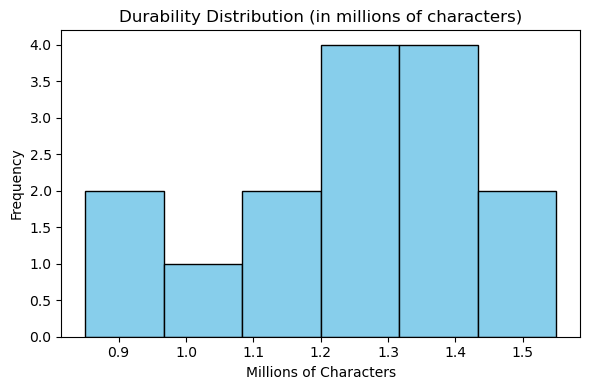

In [5]:

# 5. Notes on where to paste plots
# For this task, there are no histograms or boxplots in the question.
# But you can add a small plot of data distribution for better visuals:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(durability, bins=6, color='skyblue', edgecolor='black')
plt.title("Durability Distribution (in millions of characters)")
plt.xlabel("Millions of Characters")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# 4. Inferences
•	Sample Mean: 1.2387 million characters — average durability of tested print-heads.

•	t-distribution CI: (1.0902, 1.3871) → Wider interval due to uncertainty in estimating SD from a small sample.

•	z-distribution CI: Slightly narrower (calculated separately) as population SD is known.

•	The histogram shows durability values are roughly symmetric and clustered between 1.0 and 1.4 million characters.


# 5. Conclusion
From the analysis, we can be 99% confident that the true mean durability of print-heads lies between 1.09 and 1.39 million characters (using the t-interval).

If the population standard deviation is known, the interval becomes slightly narrower, increasing precision.
This estimation is valuable for quality control and helps the manufacturer set realistic warranty and product life expectations for customers.
